<a href="https://www.kaggle.com/code/vishorita/customer-churn-eda-and-model?scriptVersionId=121418537" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

import h2o
from h2o.automl import H2OAutoML


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.drop(columns=['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [6]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [7]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

# Data Analysis

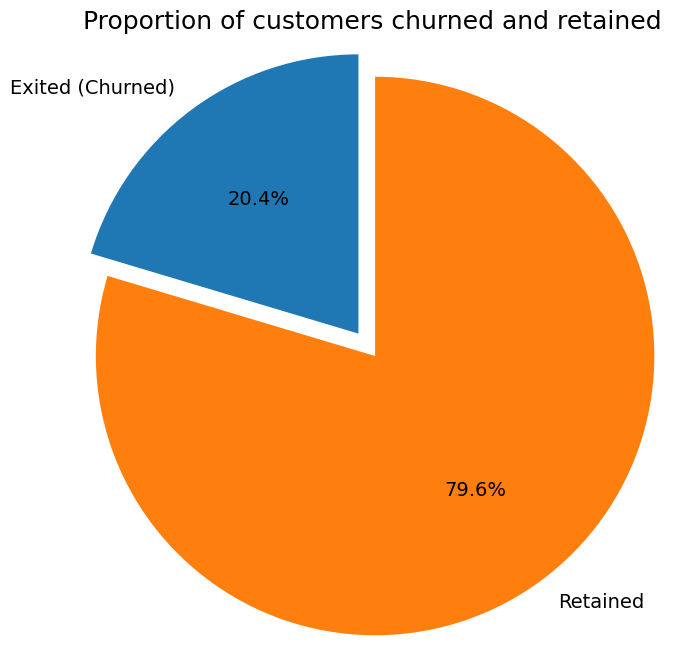

In [8]:
# Count the number of customers who churned and were retained
churned_count = df[df['Exited'] == 1]['Exited'].count()
retained_count = df[df['Exited'] == 0]['Exited'].count()

# Create labels and sizes lists for the pie chart
labels = ['Exited (Churned)', 'Retained']
sizes = [churned_count, retained_count]

# Create the pie chart with some customization
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sizes,
       labels=labels,
       autopct='%1.1f%%',
       startangle=90,
       textprops={'fontsize': 14},
       explode=[0.1, 0])

# Add a title and adjust the axis to make it equal
plt.title('Proportion of customers churned and retained', size=18)
ax.axis('equal')

# Display the pie chart
plt.show()


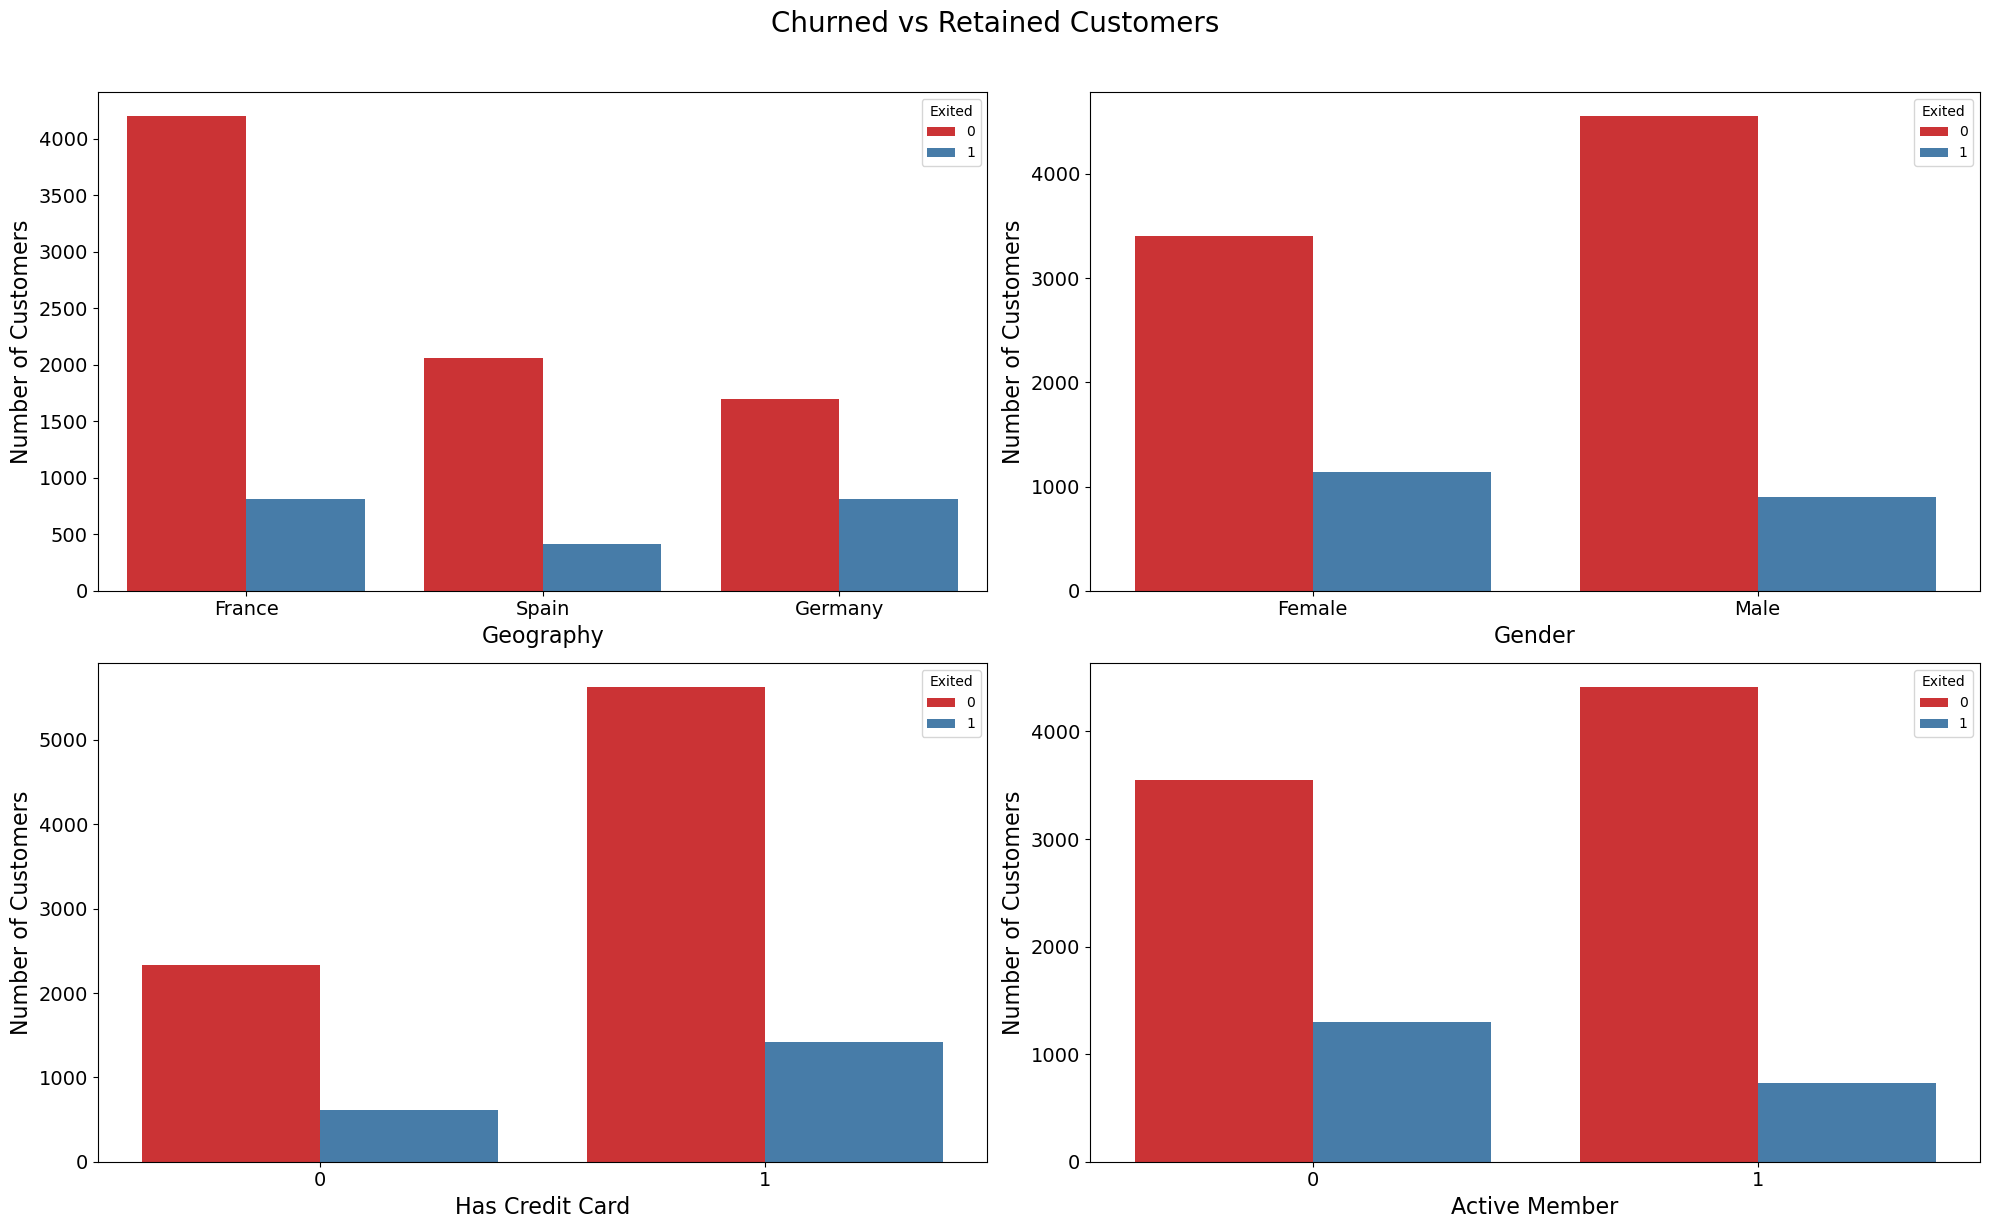

In [9]:
fig, axarr = plt.subplots(2,2, figsize=(20,12))
palette = 'Set1'

sns.countplot(x='Geography', hue='Exited', data=df, palette=palette, ax=axarr[0][0])
axarr[0][0].set_xlabel('Geography', fontsize=16)
axarr[0][0].set_ylabel('Number of Customers', fontsize=16)
axarr[0][0].tick_params(labelsize=14)

sns.countplot(x='Gender', hue='Exited', data=df, palette=palette, ax=axarr[0][1])
axarr[0][1].set_xlabel('Gender', fontsize=16)
axarr[0][1].set_ylabel('Number of Customers', fontsize=16)
axarr[0][1].tick_params(labelsize=14)

sns.countplot(x='HasCrCard', hue='Exited', data=df, palette=palette, ax=axarr[1][0])
axarr[1][0].set_xlabel('Has Credit Card', fontsize=16)
axarr[1][0].set_ylabel('Number of Customers', fontsize=16)
axarr[1][0].tick_params(labelsize=14)

sns.countplot(x='IsActiveMember', hue='Exited', data=df, palette=palette, ax=axarr[1][1])
axarr[1][1].set_xlabel('Active Member', fontsize=16)
axarr[1][1].set_ylabel('Number of Customers', fontsize=16)
axarr[1][1].tick_params(labelsize=14)

plt.suptitle('Churned vs Retained Customers', fontsize=20, y=1.02)

plt.tight_layout()
plt.show()

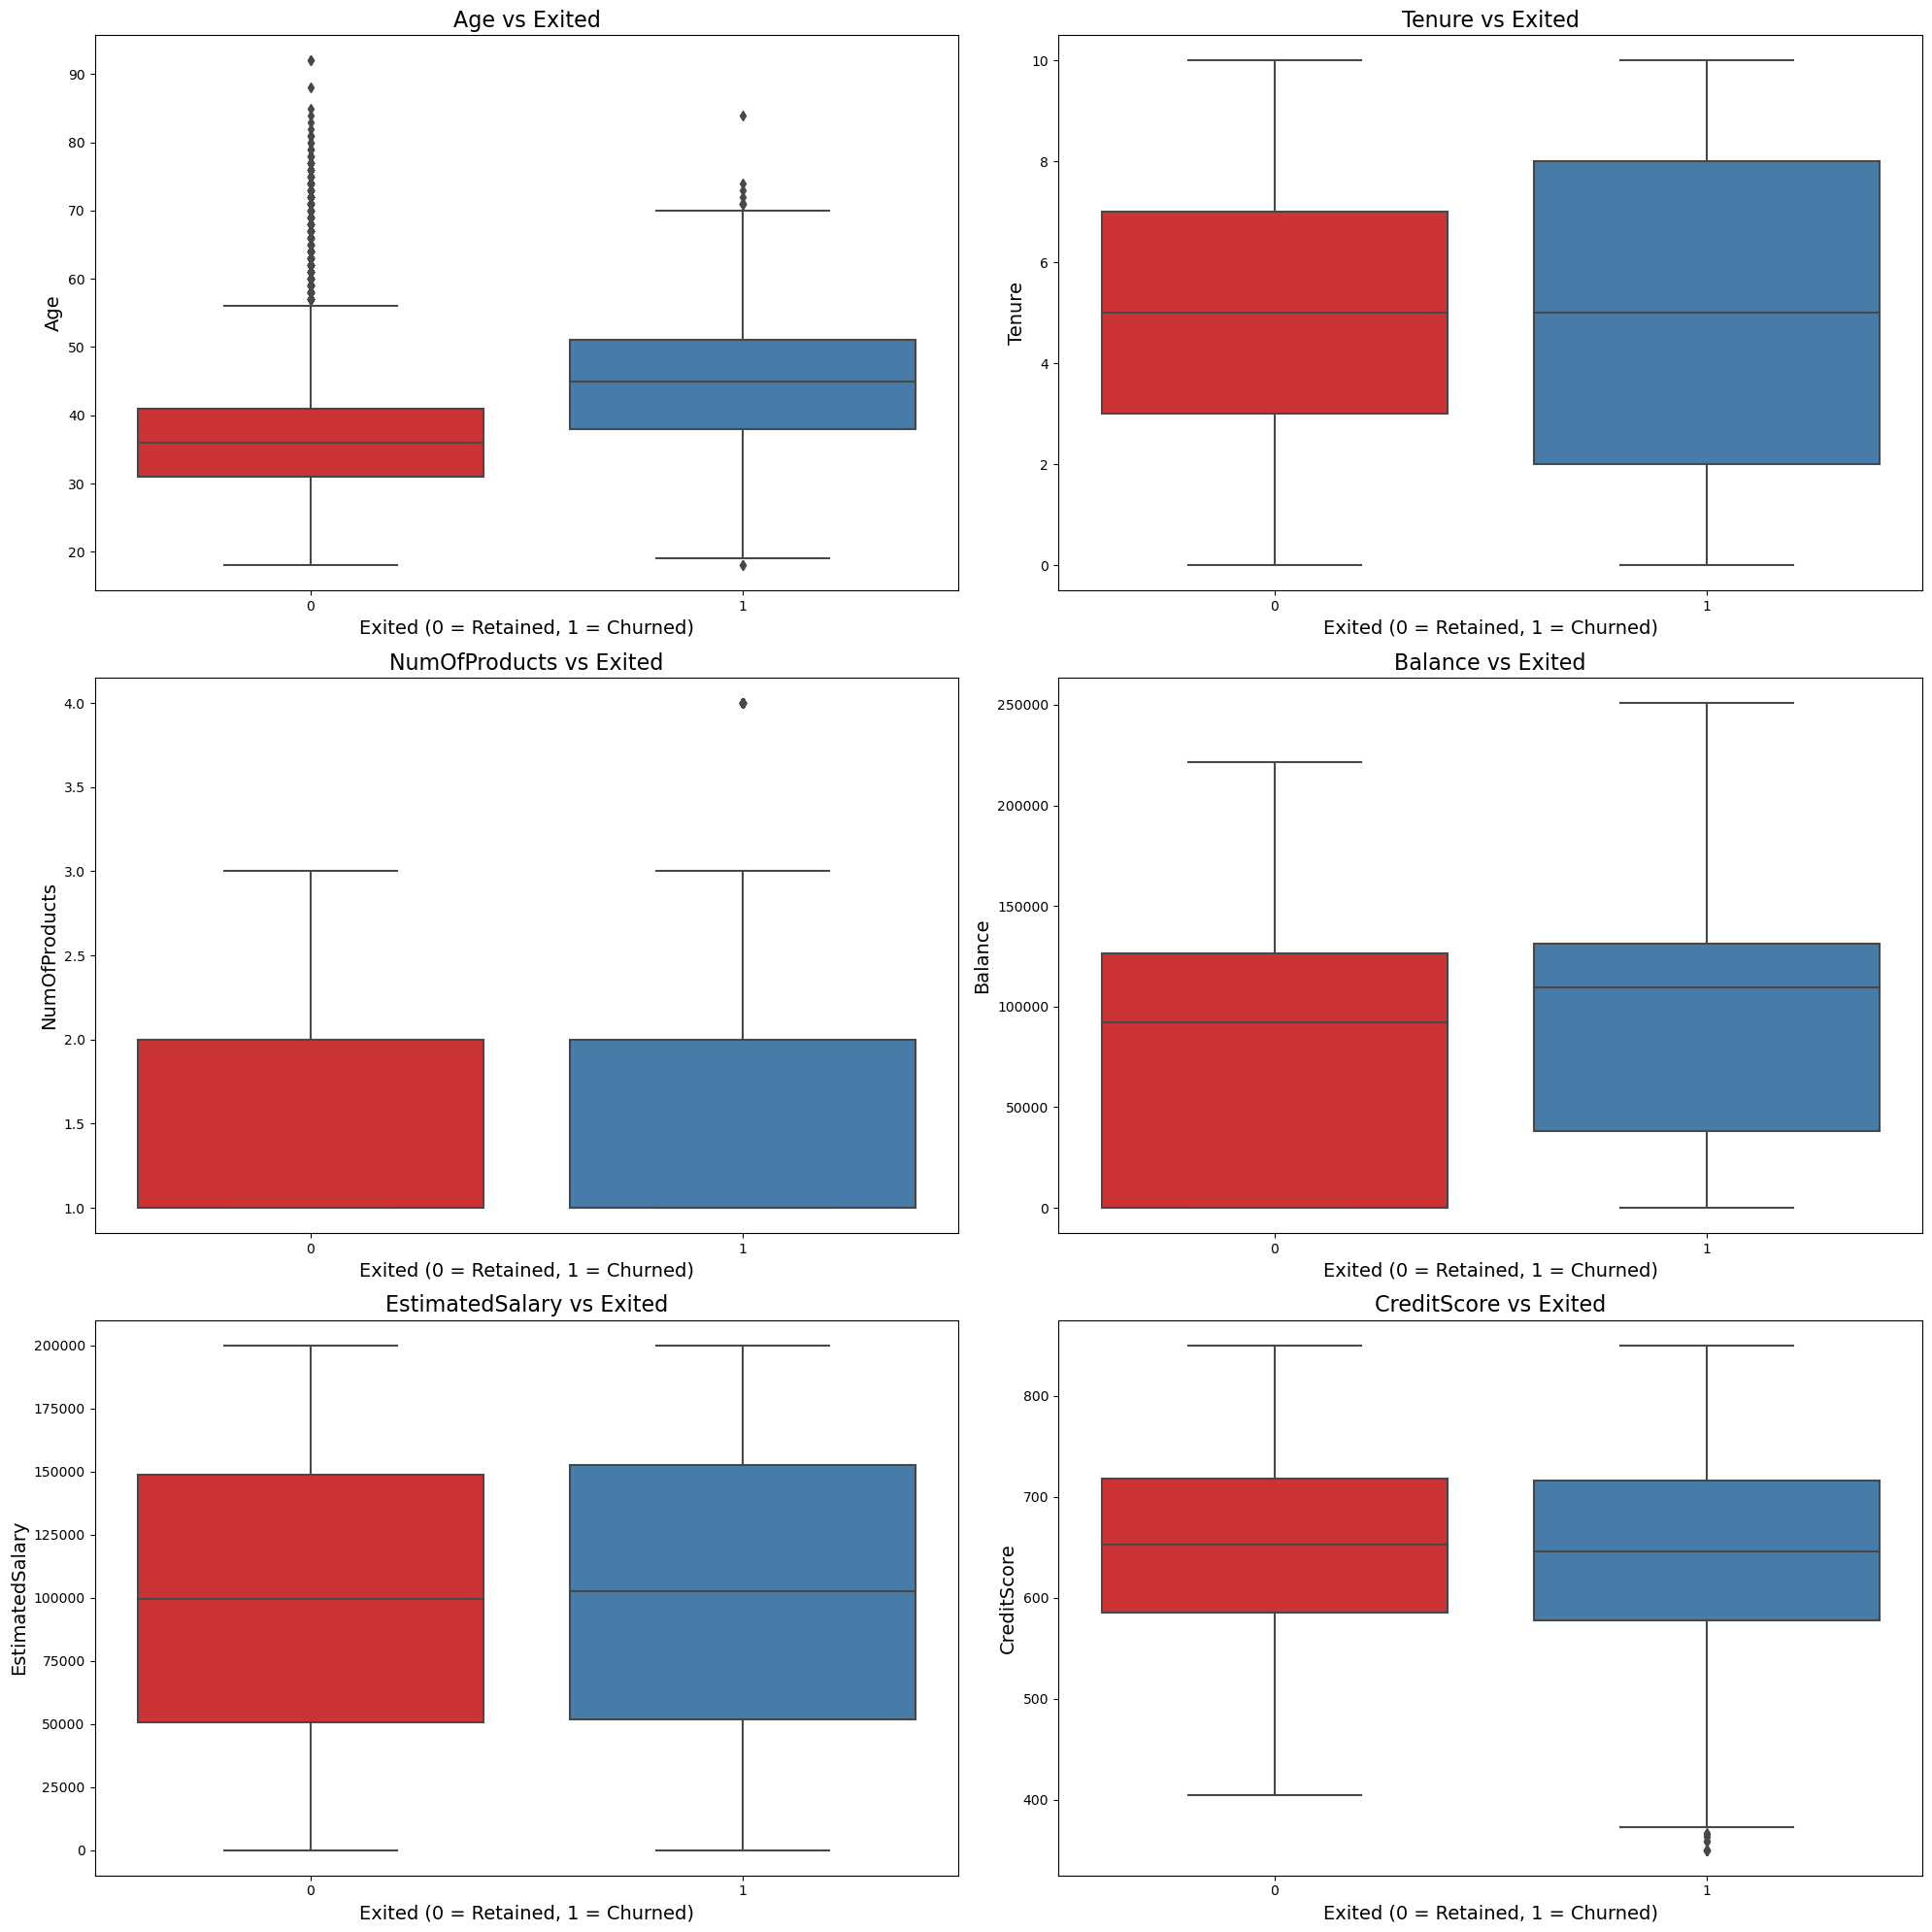

In [10]:
fig, axarr = plt.subplots(3,2, figsize=(20,20))

sns.boxplot(y=df['Age'], x=df['Exited'], ax=axarr[0][0], palette='Set1')
axarr[0][0].set_title('Age vs Exited', size=16)
axarr[0][0].set_xlabel('Exited (0 = Retained, 1 = Churned)', size=14)
axarr[0][0].set_ylabel('Age', size=14)

sns.boxplot(y=df['Tenure'], x=df['Exited'], ax=axarr[0][1], palette='Set1')
axarr[0][1].set_title('Tenure vs Exited', size=16)
axarr[0][1].set_xlabel('Exited (0 = Retained, 1 = Churned)', size=14)
axarr[0][1].set_ylabel('Tenure', size=14)

sns.boxplot(y=df['NumOfProducts'], x=df['Exited'], ax=axarr[1][0], palette='Set1')
axarr[1][0].set_title('NumOfProducts vs Exited', size=16)
axarr[1][0].set_xlabel('Exited (0 = Retained, 1 = Churned)', size=14)
axarr[1][0].set_ylabel('NumOfProducts', size=14)

sns.boxplot(y=df['Balance'], x=df['Exited'], ax=axarr[1][1], palette='Set1')
axarr[1][1].set_title('Balance vs Exited', size=16)
axarr[1][1].set_xlabel('Exited (0 = Retained, 1 = Churned)', size=14)
axarr[1][1].set_ylabel('Balance', size=14)

sns.boxplot(y=df['EstimatedSalary'], x=df['Exited'], ax=axarr[2][0], palette='Set1')
axarr[2][0].set_title('EstimatedSalary vs Exited', size=16)
axarr[2][0].set_xlabel('Exited (0 = Retained, 1 = Churned)', size=14)
axarr[2][0].set_ylabel('EstimatedSalary', size=14)

sns.boxplot(y=df['CreditScore'], x=df['Exited'], ax=axarr[2][1], palette='Set1')
axarr[2][1].set_title('CreditScore vs Exited', size=16)
axarr[2][1].set_xlabel('Exited (0 = Retained, 1 = Churned)', size=14)
axarr[2][1].set_ylabel('CreditScore', size=14)

plt.tight_layout()
plt.show()

In [11]:
def print_categorical_val(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f"{column}: {df[column].unique()}")

In [12]:
print_categorical_val(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [13]:
df1 = pd.get_dummies(data=df, columns=['Geography','Gender'])
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [14]:
scaling_var = ['Tenure', 'CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
df1[scaling_var] = scaler.fit_transform(df1[scaling_var])

In [15]:
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,1,0,0,1,0
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,0,0,1,1,0
2,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,1,0,0,1,0
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,1,0,0,1,0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,0,0,1,1,0


In [16]:
X = df1.drop('Exited', axis='columns')
y = df1['Exited']

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=5)

In [18]:
len(X_train.columns)

13

In [19]:
model = Sequential([
    Dense(12, input_dim=13, activation='relu'),
    Dense(6, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                168       
                                                                 
 dense_1 (Dense)             (None, 6)                 78        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 253
Trainable params: 253
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5226 - accuracy: 0.7952
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4466 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4248 - accuracy: 0.7962
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.8098
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3983 - accuracy: 0.8317
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3843 - accuracy: 0.8403
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3724 - accuracy: 0.8465
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3624 - accuracy: 0.8518
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3551 - accuracy: 0.8512
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3491 - accura

In [22]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3457 - accuracy: 0.8580


[0.3456803858280182, 0.8579999804496765]

In [23]:
yp = model.predict(X_test)
yp

63/63 [==============================] - 0s 1ms/step


array([[0.03768356],
       [0.05463509],
       [0.03632316],
       ...,
       [0.02971985],
       [0.01130692],
       [0.10257318]], dtype=float32)

In [24]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [25]:
y_pred[:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.74      0.46      0.57       405

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000



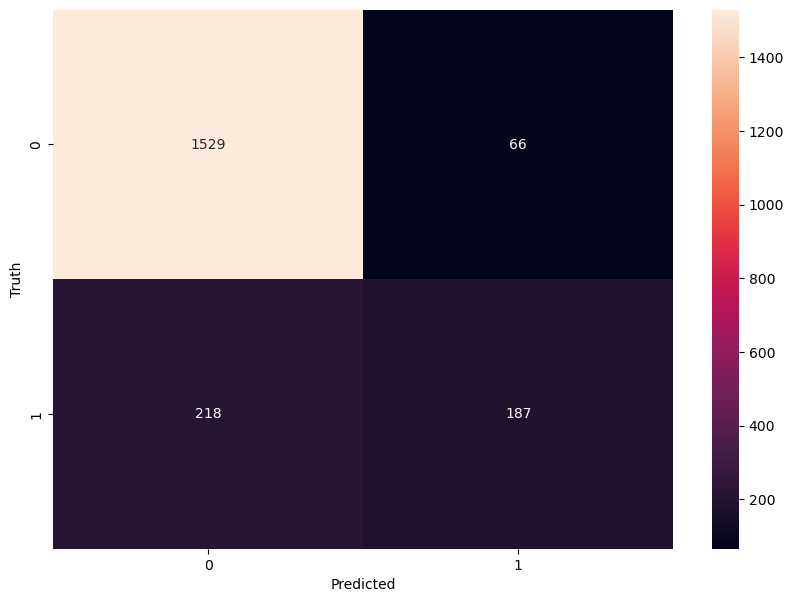

In [27]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [28]:
print("Accuracy score: ", accuracy_score(y_test,y_pred)*100,"%")

Accuracy score:  85.8 %
